## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
data.shape

(299, 28)

## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

## Observations:

- hospital_number column is not useful hence drop that column from the data
- data contains missing values in some columns hence we need to think on how to treat them
- temp_of_extremities column contains cool and cold as seperate values. Replace all cold values with cool

In [31]:
data = data.drop(['hospital_number'], axis = 1)
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## Replacing temp_of_extrimities values

In [32]:
data['temp_of_extremities'] = data['temp_of_extremities'].replace({'cool' : 'cold'})
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cold,reduced,NaN,more_3_sec,extreme_pain,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [33]:
data['temp_of_extremities'].unique()

array(['cold', nan, 'normal', 'warm'], dtype=object)

## Target variable : outcome

In [34]:
data['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [35]:
data['outcome'].value_counts(normalize = True) * 100

lived         59.531773
died          25.752508
euthanized    14.715719
Name: outcome, dtype: float64

## Observations:

- Out 299 horses, 178 horses survived, which is more than 50%
- 60% horses lived, 25% horses died and 14% were euthanized

## Check the distribution using plots

<Axes: xlabel='outcome', ylabel='count'>

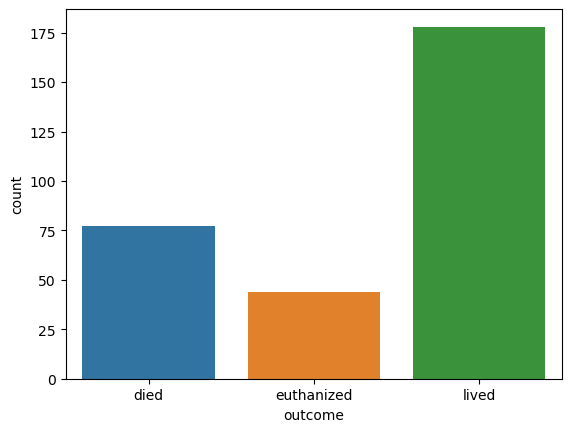

In [36]:
sns.countplot(x = data['outcome'])

## Out of the 60% horses which lived what % of those horses were young and adult

In [38]:
data.groupby('age')['outcome'].count()

age
adult    275
young     24
Name: outcome, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

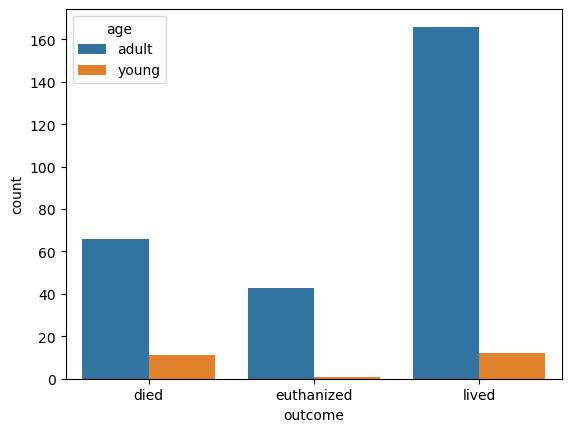

In [40]:
sns.countplot(x = data['outcome'], hue = data['age'])

## Missing values

In [42]:
data.isnull().sum() / len(data) * 100

surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [43]:
data = data.drop(['nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces','abdomen','abdomo_appearance', 'abdomo_protein'], axis = 1)
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cold,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no


In [44]:
data.shape

(299, 20)

In [45]:
data.isnull().sum() / len(data) * 100

surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
packed_cell_volume        9.698997
total_protein            11.036789
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  packed_cell_volume     270 non-null    float64
 13  total_protein          266 non-null    float64
 14  outcome                299 non-null    object 
 15  surgic

In [48]:
num_cols = data.select_dtypes(['int', 'float'])
num_cols

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,38.5,66.0,28.0,45.0,8.4,11300,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0
3,39.1,164.0,84.0,48.0,7.2,2208,0,0
4,37.3,104.0,35.0,74.0,7.4,4300,0,0
...,...,...,...,...,...,...,...,...
294,NaN,120.0,70.0,55.0,65.0,3205,0,0
295,37.2,72.0,24.0,44.0,NaN,2208,0,0
296,37.5,72.0,30.0,60.0,6.8,3205,0,0
297,36.5,100.0,24.0,50.0,6.0,2208,0,0


In [49]:
cat_cols = data.select_dtypes('object')
cat_cols

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome,surgical_lesion,cp_data
0,no,adult,cold,reduced,NaN,more_3_sec,extreme_pain,absent,severe,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,euthanized,no,no
295,no,adult,cold,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died,yes,no
297,yes,adult,cold,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived,yes,yes


In [50]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = 'mean')
sim

SimpleImputer()

In [57]:
data[num_cols] = sim.fit(data[num_cols])

ValueError: Boolean array expected for the condition, not object

In [59]:
from sklearn.impute import SimpleImputer
sim_cat = SimpleImputer(strategy = 'most_frequent')
sim_cat

SimpleImputer(strategy='most_frequent')

In [67]:
data[cat_cols] = sim_cat.fit_transform(cat_cols[cat_cols.columns.tolist()])

TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [64]:
cat_cols.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'outcome', 'surgical_lesion', 'cp_data'],
      dtype='object')